In [101]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [102]:
import os
print(os.getcwd())

C:\Users\Cheng\OneDrive\Documents\Proj\VarianceArithemtic\IPyNb


In [103]:
def PlotHisto(topic, sInput):
    sHisto = [str(i/10) for i in range(-30, 31, 2)]
    dfPlot = df[df['Input Uncertainty'].isin(sInput.keys())].set_index('Input Uncertainty')
    ax = dfPlot[sHisto].T.plot(grid=True, title=f'Histogram for {topic}', 
                               xlabel='Normalized Error', ylabel='Normalized Count',
                              style=sInput)
    ax.legend(bbox_to_anchor=(1.0, 1.0)) 

In [104]:
def PlotCompare(topic, leftLegned=(1,1), rightLegend=(1,0.2)):
    dfPlot = df.sort_values('Input Uncertainty')
    if 'Value Diff' not in dfPlot.columns:
        dfPlot['Value Diff'] = df['Mean']/df['Value'] - 1
    if 'Uncertainty Diff' not in dfPlot.columns:
        dfPlot['Uncertainty Diff'] = df['Deviation']/df['Uncertainty'] - 1

    fig, ax = plt.subplots()
    ax.set_title('Sampled vs Variance Arithmetic for ' + topic)
    ax.set_xlabel(r'Input Uncertainty $\delta x$')
    ax.set_xscale('log')
    ax.set_ylabel('Sampled vs Variance Arithmetic Error Ratio')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Value Diff'], f'g-', label='Mean vs Value')
    ax.plot(dfPlot['Input Uncertainty'], dfPlot['Uncertainty Diff'], f'b-', label='Deviation vs Uncertainty')

    ax2 = ax.twinx()
    ax2.set_ylabel('Error Deviation')
    ax2.plot(dfPlot['Input Uncertainty'], dfPlot['Normalized Error Deviation'], f'm--', label='Error Deviation')

    ax.grid(True)
    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

In [105]:
def PlotEdge(valueFunc, topic, xLabel, leftLegned=(1.1,1), rightLegend=(1.1,0.2), sigma=0):
    fig, ax = plt.subplots()
    ax.set_title(f'Largest $\delta x$ for {topic}')
    ax.set_xlabel(xLabel)
    #ax.set_xscale('log')
    ax.set_ylabel(r'Largest $\delta x$')
    ax.grid(True)
    ax.plot(df['Edge Value'], df['Edge Uncertainty'], f'k-', label=r'Largest $\delta x$')
    if sigma:
            ax.plot(df['Edge Value'], df['Edge Value']/sigma, f'k--', label=r'$1/\sigma = 0.2$')

    ax2 = ax.twinx()
    ax2.set_ylabel('Uncertainty')
    ax2.plot(df['Edge Value'], df['Value'] - valueFunc(df['Edge Value']), c='gray', ls='--', label='Uncertainty Bias')
    ax2.plot(df['Edge Value'], df['Uncertainty'], c='gray', ls='-', label='Uncertainty')

    ax.legend(bbox_to_anchor=leftLegned)
    ax2.legend(bbox_to_anchor=rightLegend)

# Convergence Edge

In [177]:
df = pd.read_csv("../Python/Output/PowerAtOneEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-6.0,0.154,1.894787,6.733063,NotMonotonicException: 1.000000e+00~1.550e-01*...
1,-5.8,0.156,1.851423,6.365572,NotMonotonicException: 1.000000e+00~1.570e-01*...
2,-5.6,0.158,1.807601,5.985427,NotMonotonicException: 1.000000e+00~1.590e-01*...
3,-5.4,0.160,1.763539,5.596590,NotMonotonicException: 1.000000e+00~1.610e-01*...
4,-5.2,0.162,1.719451,5.203107,NotMonotonicException: 1.000000e+00~1.630e-01*...


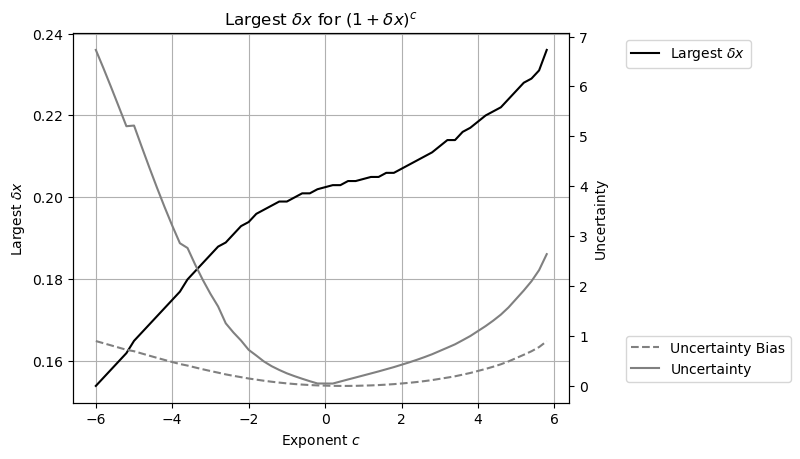

In [178]:
PlotEdge(lambda edgeVal: 1, topic=r'$(1 + \delta x)^c$', xLabel=r'Exponent $c$')

In [159]:
df = pd.read_csv("../Python/Output/SinEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,-3.141593,1.00,-7.427862e-17,0.657520,NotReliableException: sin(-3.141593e+00~1.010e...
1,-2.945243,1.01,-1.171451e-01,0.652858,NotReliableException: sin(-2.945243e+00~1.020e...
2,-2.748894,1.04,-2.228298e-01,0.640081,NotReliableException: sin(-2.748894e+00~1.050e...
3,-2.552544,1.13,-2.934024e-01,0.631689,NotReliableException: sin(-2.552544e+00~1.140e...
4,-2.356194,1.41,-2.616826e-01,0.656903,NotReliableException: sin(-2.356194e+00~1.420e...


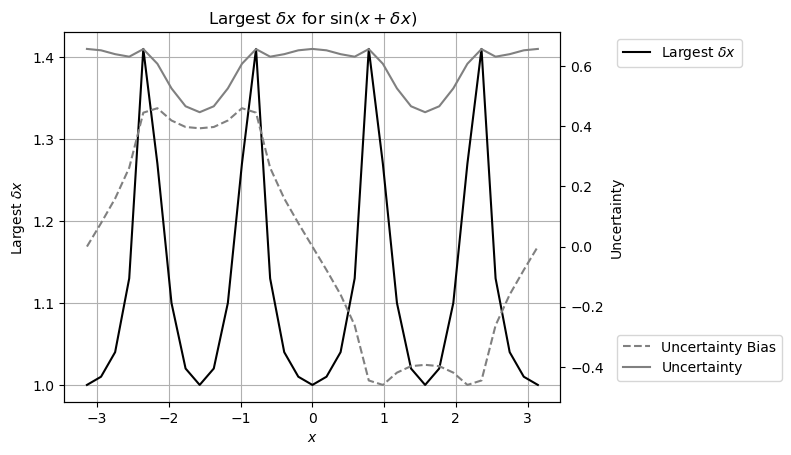

In [160]:
PlotEdge(lambda edgeVal: np.sin(edgeVal), topic=r'$\sin(x + \delta x)$', xLabel=r'$x$')

In [164]:
df = pd.read_csv("../Python/Output/LogEdge.txt", sep='\t')
df.head()

,Edge Value,Edge Uncertainty,Value,Uncertainty,Exception
0,0.0625,0.01,-2.785929,0.165687,NotMonotonicException: log(6.250000e-02~2.000e...
1,0.1250,0.02,-2.092782,0.165687,NotMonotonicException: log(1.250000e-01~3.000e...
2,0.1875,0.03,-1.687317,0.165687,NotMonotonicException: log(1.875000e-01~4.000e...
3,0.2500,0.05,-1.407704,0.212005,NotMonotonicException: log(2.500000e-01~6.000e...
4,0.3125,0.06,-1.182761,0.202419,NotMonotonicException: log(3.125000e-01~7.000e...


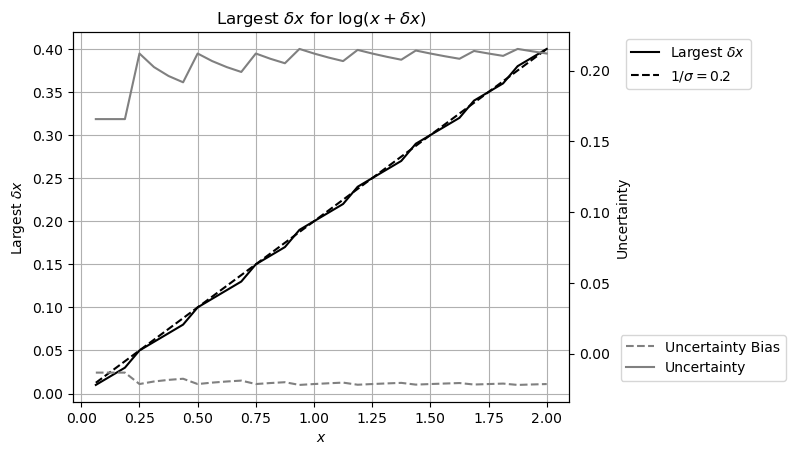

In [165]:
PlotEdge(lambda edgeVal: np.log(edgeVal), topic=r'$\log(x + \delta x)$', xLabel=r'$x$', rightLegend=(1.45,0.2), sigma=5)

# Power

## Square

In [141]:
df = pd.read_csv("../Python/Output/SquareAtZero.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,2,0,0.0001,9.999857e-09,1.414086e-08,9.976810e-09,1.414904e-08,-0.001630,1.000578,0,...,0.018102,0.015444,0.012787,0.010405,0.008422,0.006817,0.006552,0.005254,0.004313,0.001860
1,2,0,0.0010,9.999857e-07,1.414086e-06,1.004360e-06,1.416592e-06,0.003093,1.001772,0,...,0.018605,0.015189,0.013000,0.010760,0.008479,0.007027,0.006239,0.004746,0.004357,0.001933
2,2,0,0.0100,9.999857e-05,1.414086e-04,1.002730e-04,1.411679e-04,0.001941,0.998298,0,...,0.018086,0.015080,0.012882,0.010040,0.008782,0.007494,0.005930,0.005235,0.003987,0.001830
3,2,0,0.1000,9.999857e-03,1.414086e-02,9.987938e-03,1.410794e-02,-0.000843,0.997672,0,...,0.017816,0.015177,0.011546,0.010023,0.008898,0.007292,0.006525,0.004623,0.004664,0.001882
4,2,0,1.0000,9.999857e-01,1.414086e+00,9.981620e-01,1.417575e+00,-0.001290,1.002467,0,...,0.017826,0.014869,0.012054,0.010397,0.009107,0.006999,0.005925,0.005045,0.004134,0.001934


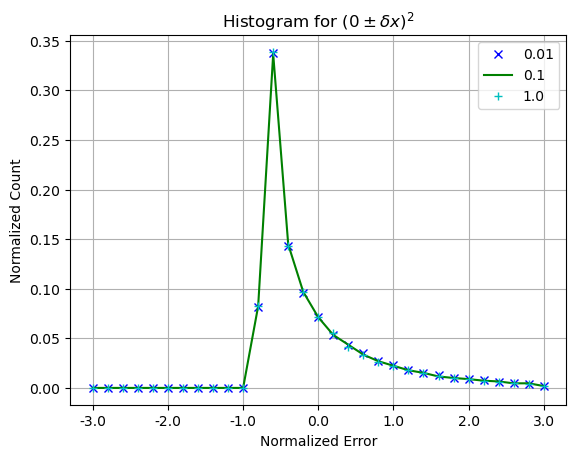

In [142]:
PlotHisto(topic=r'$(0 \pm \delta x)^2$', sInput={0.01: 'bx', 0.1: 'g-', 1: 'c+'})

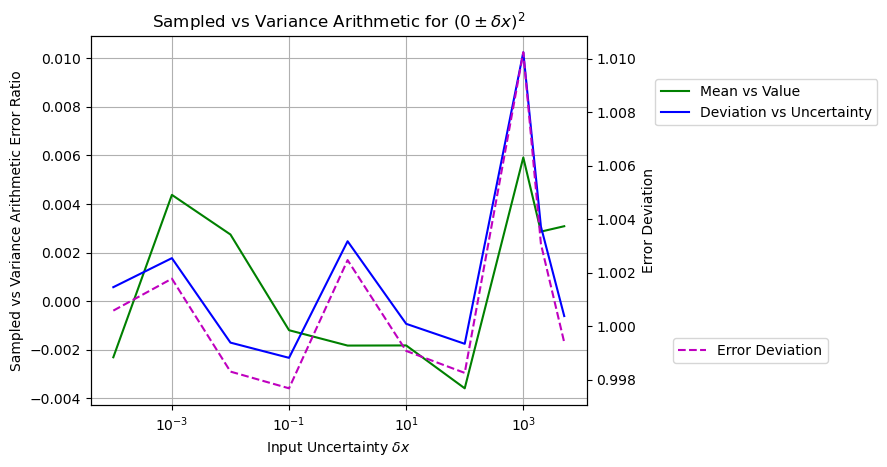

In [143]:
PlotCompare(topic=r'$(0 \pm \delta x)^2$', leftLegned=(1.6,0.9), rightLegend=(1.5,0.2))

In [115]:
df['Normalized Error Deviation'].describe()

count    10.000000
mean      1.000433
std       0.004408
min       0.994455
25%       0.997217
50%       1.000281
75%       1.003444
max       1.008584
Name: Normalized Error Deviation, dtype: float64

## Inversion

In [144]:
df = pd.read_csv("../Python/Output/InversionAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,-1,1,0.1990,1.045692,0.247197,1.045371,0.247594,-0.001297,1.001605,0,...,0.024245,0.018952,0.014733,0.011134,0.009633,0.006997,0.005182,0.004563,0.003650,0.001359
1,-1,1,0.1000,1.010316,0.104291,1.010605,0.103993,0.002774,0.997141,1,...,0.032359,0.025884,0.019166,0.015570,0.010696,0.008712,0.006184,0.004361,0.003374,0.001289
2,-1,1,0.0001,1.000000,0.000100,1.000000,0.000100,0.003792,1.002778,131,...,0.040624,0.030147,0.022869,0.016201,0.011249,0.007098,0.004562,0.002968,0.001604,0.000481
3,-1,1,0.0002,1.000000,0.000200,1.000000,0.000200,-0.002164,1.002152,143,...,0.040614,0.029590,0.022198,0.015277,0.010763,0.007332,0.004434,0.002768,0.001565,0.000502
4,-1,1,0.0005,1.000000,0.000500,1.000000,0.000501,0.000477,1.002108,126,...,0.038730,0.028213,0.023220,0.016412,0.011129,0.007790,0.004883,0.002627,0.001524,0.000421


In [145]:
df['Input Uncertainty'].unique()

array([1.99e-01, 1.00e-01, 1.00e-04, 2.00e-04, 5.00e-04, 1.00e-03,
       2.00e-03, 5.00e-03, 1.00e-02, 2.00e-02, 5.00e-02])

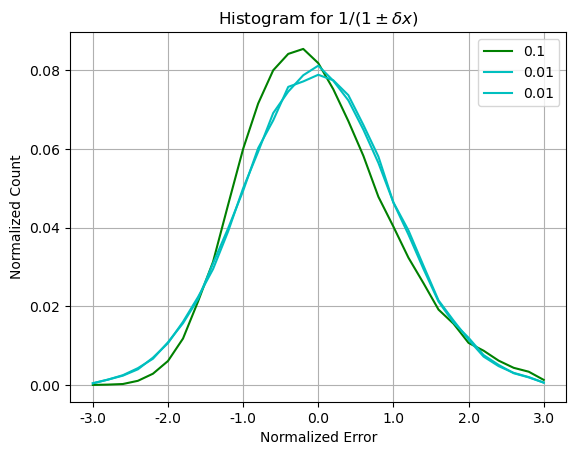

In [146]:
PlotHisto(topic=r'$1/(1 \pm \delta x)$', sInput={0.1999871: 'b-', 0.1: 'g-', 0.01: 'c-'})

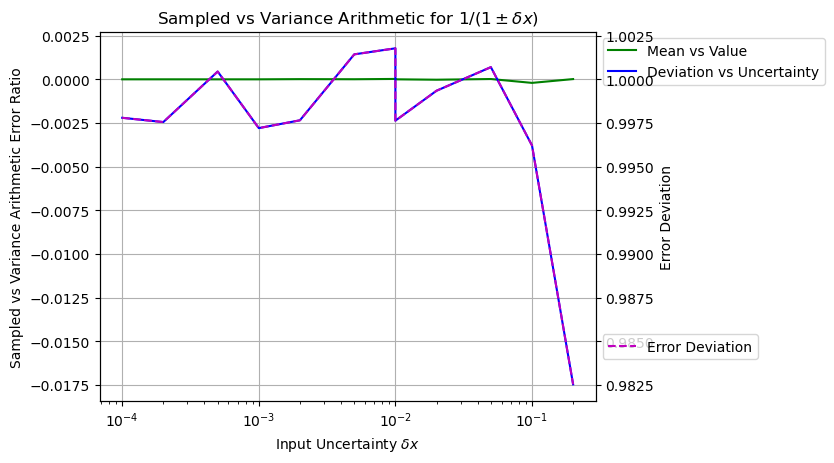

In [119]:
PlotCompare(topic=r'$1/(1 \pm \delta x)$')

## Square Root

In [137]:
df = pd.read_csv("../Python/Output/SquareRootAtOne.txt", sep='\t')
df.head()

,Exponent,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.5,1,0.0001,1.0,0.00005,1.000000,0.000050,0.004808,1.004596,134,...,0.038688,0.029823,0.021781,0.016476,0.010991,0.007541,0.004513,0.003069,0.001695,0.000712
1,0.5,1,0.0002,1.0,0.00010,1.000000,0.000100,0.001751,1.002660,127,...,0.038741,0.030680,0.022699,0.015741,0.010908,0.007259,0.004632,0.002767,0.001624,0.000602
2,0.5,1,0.0005,1.0,0.00025,1.000000,0.000250,-0.000704,0.998565,114,...,0.038716,0.029403,0.022375,0.015739,0.011168,0.007258,0.004471,0.002957,0.001774,0.000571
3,0.5,1,0.0010,1.0,0.00050,1.000000,0.000501,0.000460,1.002044,141,...,0.039099,0.030244,0.022051,0.015794,0.010670,0.007391,0.004763,0.002748,0.001524,0.000511
4,0.5,1,0.0020,1.0,0.00100,0.999994,0.001002,-0.005847,1.001839,141,...,0.037313,0.030093,0.022873,0.015242,0.011111,0.007210,0.004543,0.002507,0.001665,0.000652


In [138]:
df['Input Uncertainty'].unique()

array([1.00e-04, 2.00e-04, 5.00e-04, 1.00e-03, 2.00e-03, 5.00e-03,
       1.00e-02, 2.00e-02, 5.00e-02, 2.03e-01, 2.00e-01, 1.00e-01])

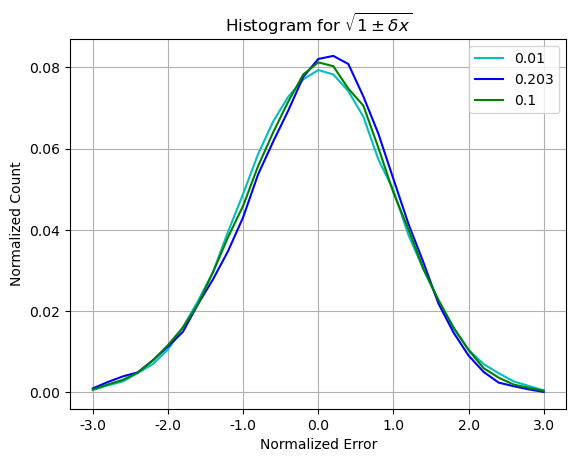

In [139]:
PlotHisto(topic=r'$\sqrt{1 \pm \delta x}$', sInput={0.203: 'b-', 0.1: 'g-', 0.01: 'c-'})

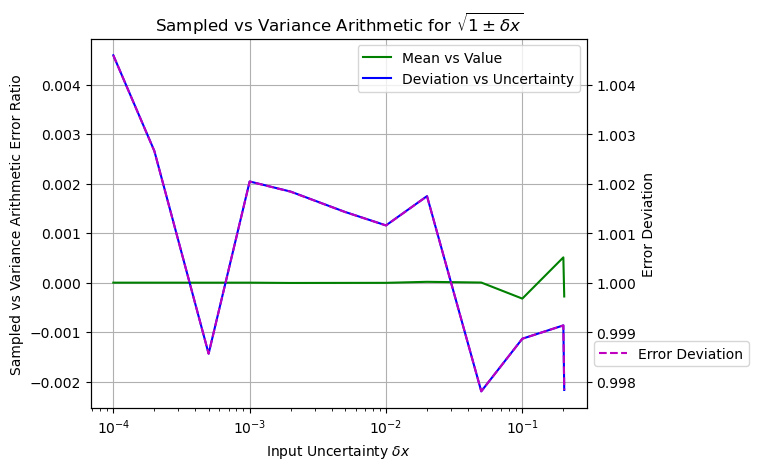

In [140]:
PlotCompare(topic=r'$\sqrt{1 \pm \delta x}$')

## Expansion

In [124]:
df = pd.read_csv("../Python/Output/PowerExpansion.txt", sep='\t')
df.head()

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
0,power,-1,1.0,0.19,2,1.000000,0.000000,3.610000e-02,1.604942e-35,0.036099,3.759893e-35,0.036099,1.618180e-35
1,power,-1,1.0,0.19,4,1.036099,0.036099,1.303210e-03,4.183152e-38,0.003909,1.131336e-36,0.010424,2.738582e-36
2,power,-1,1.0,0.19,6,1.040009,0.046524,4.704588e-05,8.177288e-41,0.000705,5.928567e-38,0.003244,2.596625e-37
3,power,-1,1.0,0.19,8,1.040714,0.049767,1.698356e-06,1.420896e-43,0.000178,5.198850e-39,0.001179,3.298049e-38
4,power,-1,1.0,0.19,10,1.040892,0.050946,6.131066e-08,2.314658e-46,0.000057,6.914483e-40,0.000499,5.753926e-39


In [125]:
df[(df['Input Uncertainty']==0.201) & (df['Order']>100)].head(10)

,Name,Parameter,Input Value,Input Uncertainty,Order,Order Value,Order Variance,Expansion Value,Expansion Variance,New Value Value,New Value Uncertainty,New Variance Value,New Variance Uncertainty
732,power,-1,1.0,0.201,102,1.046796,0.063607,8.433306e-72,3.566489e-173,3.979733e-07,3.425785e-43,0.000040,3.433868e-41
733,power,-1,1.0,0.201,104,1.046797,0.063647,3.407140e-73,5.935513e-176,3.942985e-07,3.429252e-43,0.000041,3.505927e-41
734,power,-1,1.0,0.201,106,1.046797,0.063687,1.376519e-74,9.874499e-179,3.908875e-07,3.435472e-43,0.000041,3.580994e-41
735,power,-1,1.0,0.201,108,1.046798,0.063728,5.561273e-76,1.642166e-181,3.877232e-07,3.444317e-43,0.000041,3.659099e-41
736,power,-1,1.0,0.201,110,1.046798,0.063770,2.246810e-77,2.730048e-184,3.847900e-07,3.455674e-43,0.000042,3.740276e-41
737,power,-1,1.0,0.201,112,1.046798,0.063812,9.077336e-79,4.537116e-187,3.820739e-07,3.469442e-43,0.000042,3.824566e-41
738,power,-1,1.0,0.201,114,1.046799,0.063854,3.667335e-80,7.537910e-190,3.795617e-07,3.485534e-43,0.000043,3.912014e-41
739,power,-1,1.0,0.201,116,1.046799,0.063897,1.481640e-81,1.251954e-192,3.772419e-07,3.503871e-43,0.000043,4.002672e-41
740,power,-1,1.0,0.201,118,1.046799,0.063940,5.985973e-83,2.078723e-195,3.751035e-07,3.524386e-43,0.000044,4.096594e-41
741,power,-1,1.0,0.201,120,1.046800,0.063984,2.418393e-84,3.450484e-198,3.731366e-07,3.547018e-43,0.000044,4.193840e-41


In [126]:
def PlotExpansion(topic, param, sInputUncertainty={0.201: '-', 0.200: ':', 0.199: '--'}):
    fig, ax = plt.subplots()
    ax.set_title('Taylor Expansion of Variance for ' + topic)
    ax.set_xlabel('Expansion Order')
    ax.set_ylabel('Taylor Expansion Terms')
    ax.set_yscale('log')
    ax.grid(True)
    
    for unc, style in sInputUncertainty.items():
        dfPlot = df[(df['Parameter']==param) & (df['Input Uncertainty']==unc)].sort_values('Order')
        ax.plot(dfPlot['Order'], dfPlot['New Variance Value'], c='black', ls=style, label=f'Variance $\delta x$={unc}')
        ax.plot(dfPlot['Order'], dfPlot['New Value Value'], c='gray', ls=style, label=f'Value $\delta x$={unc}')
        
    ax.legend(bbox_to_anchor=(1,1))


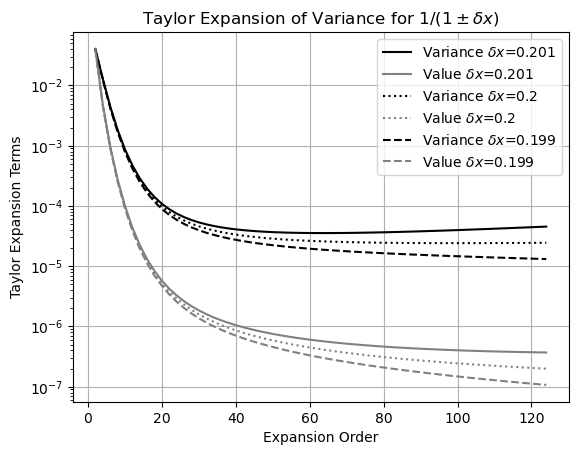

In [127]:
PlotExpansion(topic=r'$1/(1 \pm \delta x)$', param=-1)

# Sin

## PI

In [147]:
df = pd.read_csv("../Python/Output/SinAtPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0,0.0001,0.0,0.0001,-0.000001,0.000099,-0.014742,0.988878,15,9,...,0.038693,0.030273,0.022454,0.016439,0.010225,0.006215,0.004310,0.002406,0.001504,0.000401
1,0,0.0002,0.0,0.0002,0.000001,0.000201,0.007261,1.006412,16,20,...,0.038438,0.029105,0.025994,0.016158,0.011742,0.006222,0.004817,0.003312,0.002108,0.000201
2,0,0.0005,0.0,0.0005,-0.000003,0.000499,-0.006413,0.997627,11,10,...,0.039683,0.029562,0.022648,0.014731,0.008819,0.008017,0.005311,0.002605,0.001904,0.000401
3,0,0.0010,0.0,0.0010,0.000004,0.001005,0.004255,1.004820,18,20,...,0.040353,0.035635,0.021381,0.017065,0.009235,0.007328,0.004216,0.003212,0.001807,0.000602
4,0,0.0020,0.0,0.0020,-0.000006,0.001993,-0.003196,0.996326,9,13,...,0.037783,0.029665,0.023652,0.014532,0.010924,0.007015,0.003608,0.003307,0.001403,0.000301


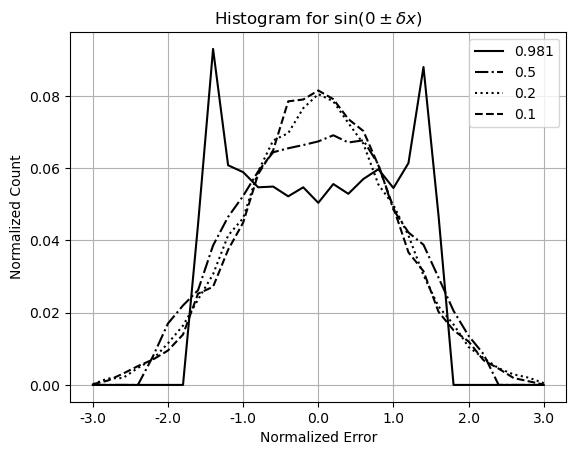

In [148]:
PlotHisto(topic=r'$\sin(0 \pm \delta x)$', sInput={0.981: 'k-', 0.5: 'k-.', 0.2: 'k:', 0.1: 'k--'})

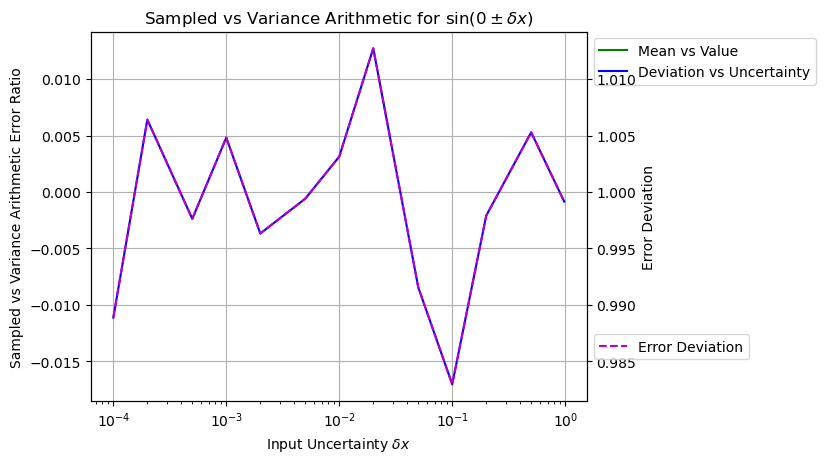

In [149]:
PlotCompare(topic=r'$\sin(0 \pm \delta x)$')

## PI/2

In [168]:
df = pd.read_csv("../Python/Output/SinAtHalfPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,1.570796,0.0001,1.000000,7.070430e-09,1.000000,1.205982e-07,0.004223,0.997074,220,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.570796,0.0002,1.000000,2.828172e-08,1.000000,5.161914e-08,-0.005764,1.007789,246,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.570796,0.0005,1.000000,1.767607e-07,1.000000,1.345237e-07,0.006640,0.979255,220,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.570796,0.0010,1.000000,7.070426e-07,1.000000,7.014634e-07,0.009840,0.994742,220,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.570796,0.0020,0.999998,2.828166e-06,0.999998,2.733581e-06,0.019354,0.966404,205,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


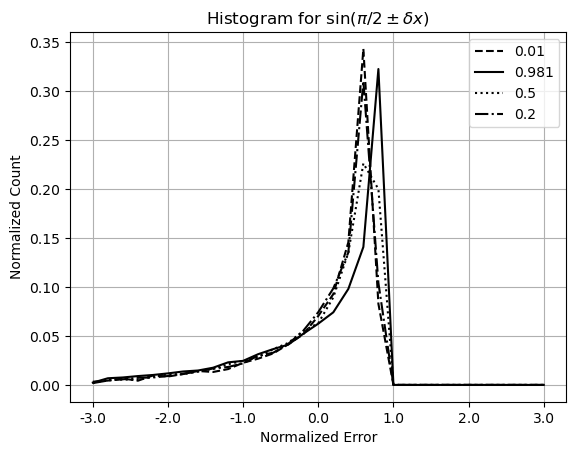

In [170]:
PlotHisto(topic=r'$\sin(\pi/2 \pm \delta x)$', sInput={0.981: 'k-', 0.5: 'k:', 0.2: 'k-.', 0.01: 'k--'})

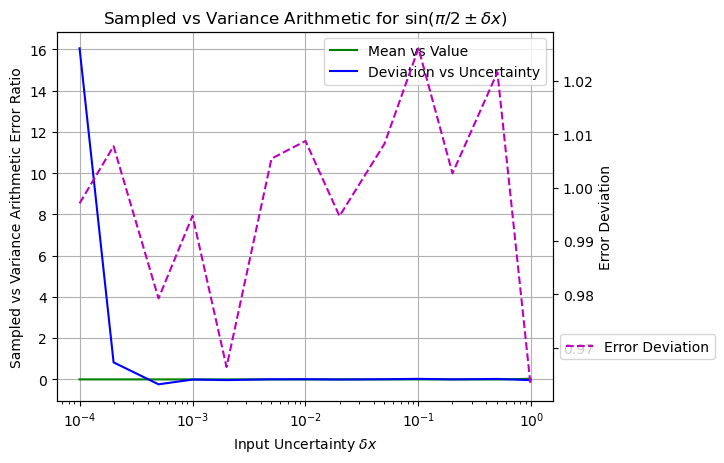

In [153]:
PlotCompare(topic=r'$\sin(\pi/2 \pm \delta x)$')

## PI/4

In [180]:
df = pd.read_csv("../Python/Output/SinAtQuarterPI.txt", sep='\t')
df.head()

,Input Value,Input Uncertainty,Value,Uncertainty,Mean,Deviation,Normalized Error Mean,Normalized Error Deviation,Less,More,...,1.2,1.4,1.6,1.8,2.0,2.2,2.4,2.6,2.8,3.0
0,0.785398,0.0001,0.707107,0.000071,0.707107,0.000070,-0.000469,0.988021,9,12,...,0.035675,0.028560,0.023850,0.018639,0.009119,0.005812,0.004309,0.002505,0.001603,0.000601
1,0.785398,0.0002,0.707107,0.000141,0.707108,0.000141,0.005809,0.995785,8,4,...,0.040849,0.029636,0.020625,0.017521,0.011314,0.007609,0.005106,0.002903,0.001302,0.000400
2,0.785398,0.0005,0.707107,0.000354,0.707098,0.000355,-0.025961,1.002974,11,24,...,0.036929,0.027296,0.022679,0.015454,0.009634,0.007225,0.003914,0.002910,0.001004,0.000301
3,0.785398,0.0010,0.707106,0.000707,0.707107,0.000702,0.000161,0.992232,14,15,...,0.035804,0.030188,0.022666,0.014642,0.009929,0.006519,0.004413,0.002908,0.002106,0.000501
4,0.785398,0.0020,0.707105,0.001414,0.707134,0.001399,0.020531,0.989270,13,10,...,0.042398,0.030570,0.022151,0.016338,0.010424,0.006515,0.004210,0.003107,0.000702,0.000501


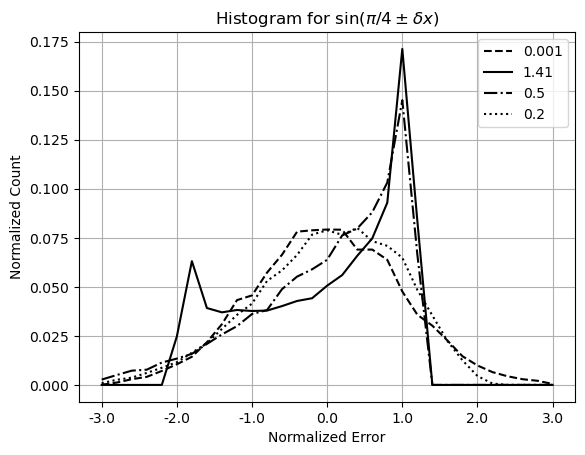

In [182]:
PlotHisto(topic=r'$\sin(\pi/4 \pm \delta x)$', sInput={1.41: 'k-', 0.2: 'k:', 0.5: 'k-.', 0.001: 'k--'})

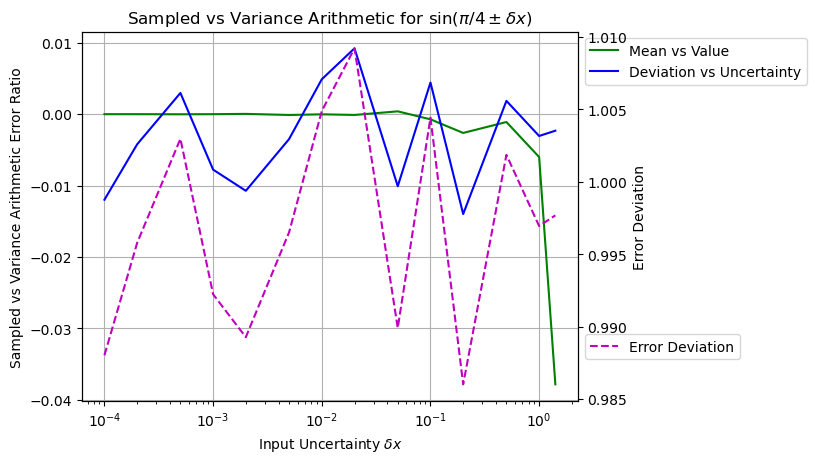

In [174]:
PlotCompare(topic=r'$\sin(\pi/4 \pm \delta x)$')